<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [20]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36-70,Middle
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,≥70,Old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36-70,Middle
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36-70,Middle
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36-70,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,36-70,Middle
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,≥70,Old
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,≥70,Old
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,≥70,Old


In [22]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_GROUP   506 non-null    category
 15  AGE_Group   506 non-null    object  
dtypes: category(1), float64(13), int64(1), object(1)
memory usage: 58.0+ KB


In [21]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


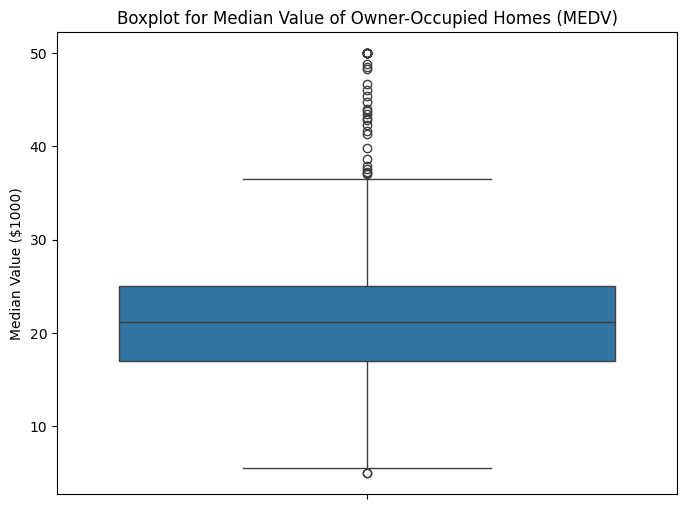

In [6]:
# Boxplot for MEDV
pyplot.figure(figsize=(8,6))
sns.boxplot(data=boston_df, y='MEDV')
pyplot.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

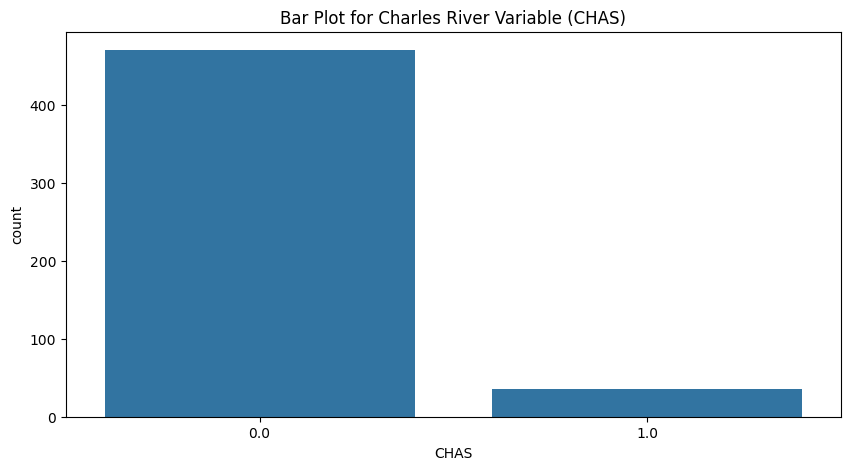

In [24]:
# Bar plot for CHAS
pyplot.figure(figsize=(10,5))
sns.countplot(data=boston_df, x='CHAS')
pyplot.title('Bar Plot for Charles River Variable (CHAS)')
pyplot.show()

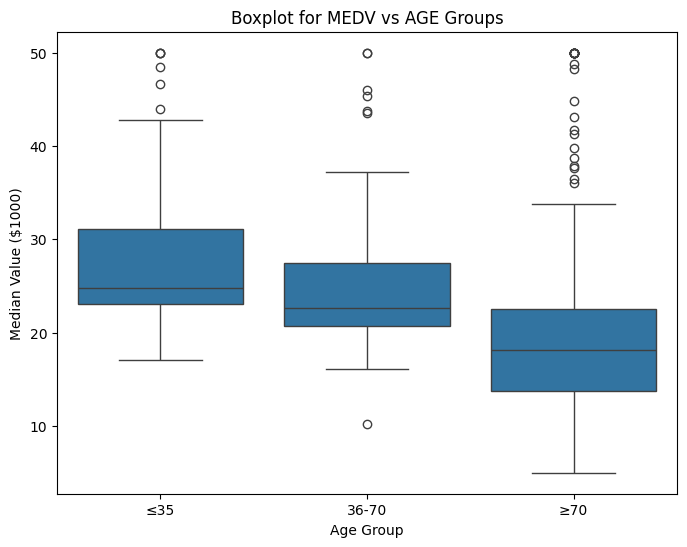

In [8]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['≤35', '36-70', '≥70'])

# Boxplot for MEDV vs AGE_GROUP
pyplot.figure(figsize=(8,6))
sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
pyplot.title('Boxplot for MEDV vs AGE Groups')
pyplot.show()

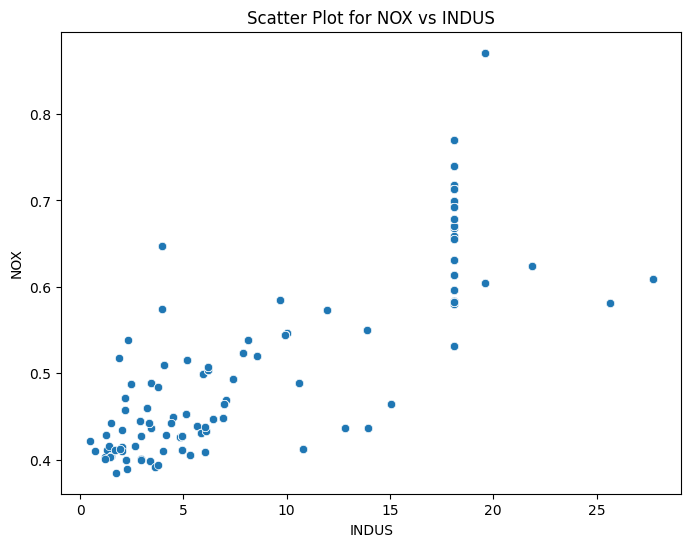

In [25]:
pyplot.figure(figsize=(8,6))
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
pyplot.title('Scatter Plot for NOX vs INDUS')
pyplot.show()

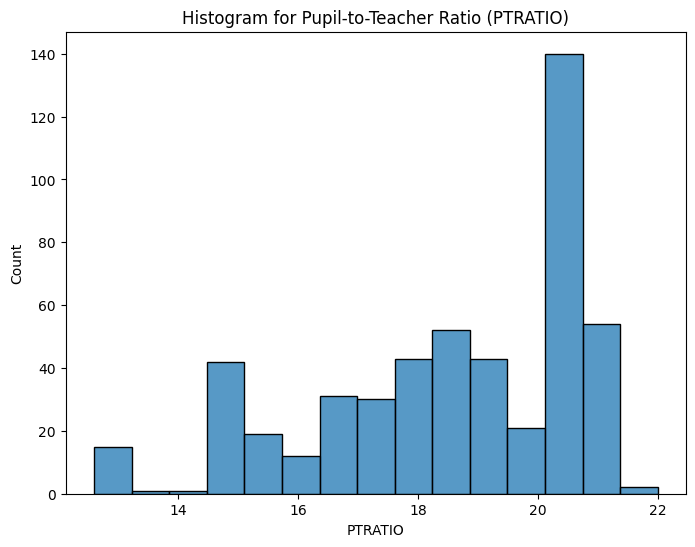

In [26]:
pyplot.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)
pyplot.title('Histogram for Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.show()

In [28]:
cr1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
cr0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.ttest_ind(cr1, cr0,)
#Reject the null hypothesis since p-value less than 0.05

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [19]:
boston_df['AGE_Group'] = 'Middle'  # Default to 'Middle'
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_Group'] = 'Young'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_Group'] = 'Old'

young_group = boston_df.loc[boston_df['AGE_Group'] == 'Young', 'MEDV']
middle_group = boston_df.loc[boston_df['AGE_Group'] == 'Middle', 'MEDV']
old_group = boston_df.loc[boston_df['AGE_Group'] == 'Old', 'MEDV']

anova_stat, anova_p_value = stats.f_oneway(young_group, middle_group, old_group)
print(f"ANOVA Test: Statistic = {anova_stat}, p-value = {anova_p_value}")
#Reject the null hypothesis since p-value less than 0.05

ANOVA Test: Statistic = 36.40764999196599, p-value = 1.7105011022702984e-15


In [13]:
from scipy import stats
corr, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: r = {corr}, p-value = {p_value_corr}")
#Reject the null hypothesis since p-value less than 0.05

Pearson Correlation: r = 0.7636514469209192, p-value = 7.913361061210442e-98


In [29]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
regression_model = sm.OLS(y, X).fit()

regression_model.summary()
#Reject the null hypothesis since p-value less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        00:44:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""